/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8392 - loss: 0.5888 - val_accuracy: 0.9556 - val_loss: 0.1529
Epoch 2/20
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9637 - loss: 0.1247 - val_accuracy: 0.9681 - val_loss: 0.1085
Epoch 3/20
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9746 - loss: 0.0848 - val_accuracy: 0.9740 - val_loss: 0.0904
Epoch 4/20
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0681 - val_accuracy: 0.9736 - val_loss: 0.0905
Epoch 5/20
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0519 - val_accuracy: 0.9779 - val_loss: 0.0771
Epoch 6/20
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9768 - val_loss: 0.0814
Epoch 7/20
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9789 - val_loss: 0.0754
Epoch 8/20
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0313 -

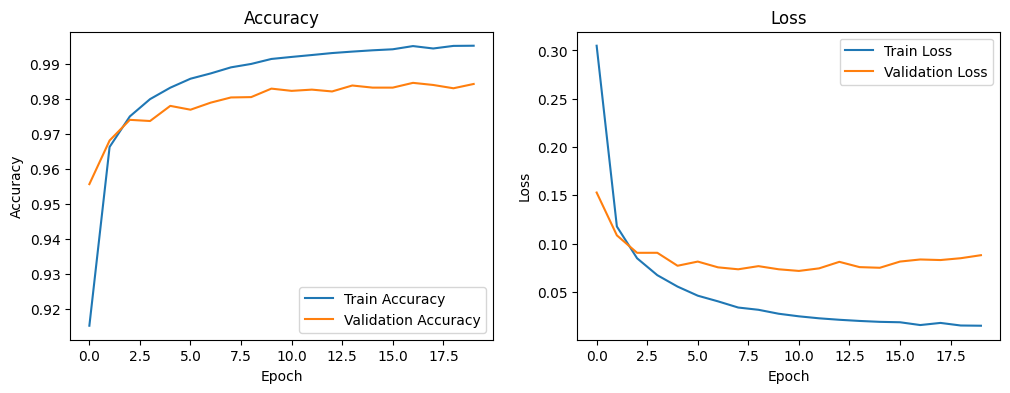

In [ ]:
#
# Решение
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Загрузка данных
url = "https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv"
data = pd.read_csv(url)

# Разделение данных на признаки и метки
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Преобразование меток в категориальный формат
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
X_train = X_train / 255.0
X_test = X_test / 255.0

# Создание модели
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 классов (буквы от A до Z)

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Оценка модели на тестовой выборке
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Графики точности и потерь
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#
#
# Выводы:
#
# Графики точности:

#На графике точности видно, что точность на обучающей выборке постепенно увеличивается с каждой эпохой, что указывает на то, что модель учится.
#Точность на валидационной выборке также увеличивается, но может начать снижаться после определенного количества эпох, что может указывать на переобучение.

# Графики потерь:

#Потери на обучающей выборке уменьшаются с каждой эпохой, что является хорошим признаком.
#Потери на валидационной выборке также уменьшаются, но могут начать увеличиваться после определенного количества эпох, что также может указывать на переобучение.